In [98]:
pip install yfinance neuralprophet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'f:\trend_prediction\prediction\Scripts\python.exe -m pip install --upgrade pip' command.


In [99]:
stock_symbol = 'SOL-USD'
start_date = '2015-01-01'
end_date = '2024-01-01'

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

print(stock_data.head())
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2020-04-10  0.832005  1.313487  0.694187  0.951054   0.951054  87364276
2020-04-11  0.951054  1.049073  0.765020  0.776819   0.776819  43862444
2020-04-12  0.785448  0.956670  0.762426  0.882507   0.882507  38736897
2020-04-13  0.890760  0.891603  0.773976  0.777832   0.777832  18211285
2020-04-14  0.777832  0.796472  0.628169  0.661925   0.661925  16747614


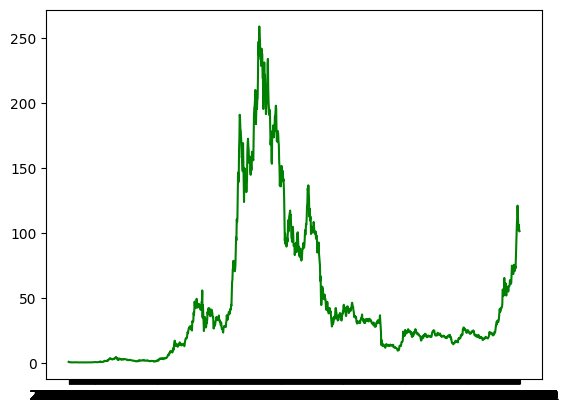

In [100]:
stocks = pd.read_csv('stock_data.csv')
stocks['Data'] = pd.to_datetime(stocks['Date'])
stocks = stocks[['Date', 'Close']]

stocks.columns= ['ds', 'y']


plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.show()

In [101]:
model = NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.927% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100
WARNING - (NP.config.set_lr_finder_args) - Learning rate fi

Epoch 100: 100%|██████████| 100/100 [00:00<00:00, 735.29it/s, loss=0.00923, v_num=15, MAE=10.30, RMSE=14.30, Loss=0.00863, RegLoss=0.000]  


,MAE,RMSE,Loss,RegLoss,epoch
0,158.331055,197.168106,0.586985,0.0,0
1,113.386574,140.580231,0.385110,0.0,1
2,75.951683,95.445808,0.227304,0.0,2
3,46.168411,64.693993,0.114862,0.0,3
4,32.689163,52.622894,0.075022,0.0,4
...,...,...,...,...,...
95,10.330038,14.363979,0.008549,0.0,95
96,10.271096,14.163336,0.008471,0.0,96
97,10.306903,14.202788,0.008470,0.0,97
98,10.282552,14.120143,0.008439,0.0,98


WARNING - (py.warnings._showwarnmsg) - f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.927% of the data.
WARNING - (py.warnings._showwarnmsg) - f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_origin

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 500.33it/s] 

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.927% of the data.
WARNING - (py.warnings._showwarnmsg) - f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - f:\trend_prediction\prediction\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Define


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 375.78it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


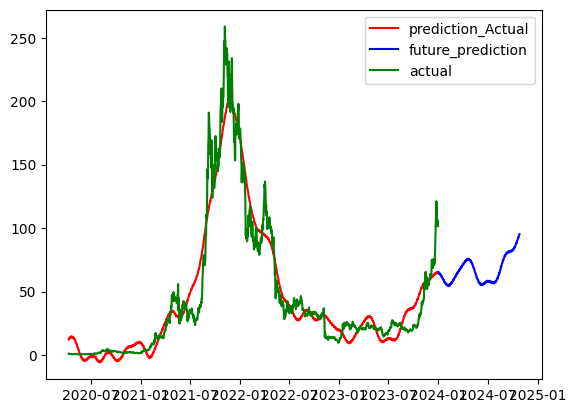

In [102]:
future = model.make_future_dataframe(stocks, periods = 300)

forecast = model.predict(future)
actual_prediction = model.predict(stocks)
actual_prediction['ds'] = pd.to_datetime(actual_prediction['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])
stocks['ds'] = pd.to_datetime(stocks['ds'])

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'prediction_Actual', c='r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c='b')
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.legend()
plt.show()

In [103]:
model.plot_components(forecast)

ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - f:\trend_prediction\prediction\lib\site-packages\neuralprophet\plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - f:\trend_prediction\prediction\lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


